In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Theta Exploration Notebook

## What is Theta $(\Theta)$?

Theta $(\Theta)$ measures how much an options value decreases as time passes assuming everything else stays the same.

### Ice Cream Explanation

Even if nothing else changes (all variables constant ex. tempature, you dont eat any ice cream) on a hot day after purchasing ice cream, it will begin to melt and theta would measure the "melting rate" for options.

## What is strike price?

We will also have to introduce strike price in order to understand theta.

Strike price is the predetermined price at which an option contract can be exercised. It's the price at which the option holder has the right (but not obligation) to buy or sell the underlying asset.

## Quick Variable Review

$$\text{stock price} = S$$
$$\text{option price} = C$$
$$\text{strike price} = K$$
$$\text{theta} = \Theta \text{ (time decay)}$$
$$\text{delta} = \Delta \text{ (price sensitivity)}$$
$$\text{gamma} = \Gamma \text{ (delta sensitivity)}$$
$$\text{time to expiration} = T$$

## Basic Example

**Scenario:** You buy a call option with:
- Stock price $(S) = \$100$
- Strike price $(K) = \$105$  
- Option price $(C) = \$3.00$
- Theta $(\Theta) = -\$0.15$ per day

If the stock price stays at $\$100$ (unchanged), theta tells us the option will lose $\$0.15$ in value each day purely due to time decay. So tomorrow the option price would be $\$2.85$, the next day $\$2.70$, and so on, even though the stock price remained constant at $\$100$.


In [2]:
option_prices = [3.50, 3.35, 3.18, 2.98, 2.75] # each of option prices are on a new day
days = [1, 2, 3, 4, 5]

thetas = []

for i in range(1, len(option_prices)):
    theta = (option_prices[i - 1] - option_prices[i]) / (days[i] - days[i - 1])
    thetas.append(theta)

print(thetas)

[0.1499999999999999, 0.16999999999999993, 0.20000000000000018, 0.22999999999999998]


## Formulas

Here we can see that theta $(\Theta)$ is the change in price of the option with respect to the change in time.

**Formal Definition**

$$\Theta = \frac{\partial C}{\partial T}$$

**Practical Definition**

$$\Theta = \frac{\text{change in option price}}{\text{change in time}}$$



In [3]:
def calculate_theta(C1, C2, time_change=1):
    theta = (C1 - C2) / time_change
    return theta


### At-The-Money (ATM) Options

At-the-money options occur when the strike price $K$ equals (or is very close to) the current stock price $S$.

**Key Characteristics:**
- $S \approx K$
- These options have the highest time value
- Theta decay is typically most pronounced for ATM options
- Maximum uncertainty about whether the option will finish in-the-money

**Example:** If a stock is trading at $\$100$, an ATM call option would have a strike price of $\$100$ (or very close to it).

ATM options are particularly sensitive to time decay because they sit right at the boundary between being profitable and unprofitable at expiration.

In [4]:
days_left = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
atm_prices = [2.50, 2.30, 2.08, 1.84, 1.58, 1.30, 1.00, 0.68, 0.35, 0.05]

In [5]:
# Calculate theta values
atm_thetas = []
for i in range(len(atm_prices) - 1):
    theta = calculate_theta(atm_prices[i], atm_prices[i + 1], days_left[i] - days_left[i + 1])
    print(f"Days left: {days_left[i]}, Theta: {theta:.4f}")
    atm_thetas.append(theta)

Days left: 10, Theta: 0.2000
Days left: 9, Theta: 0.2200
Days left: 8, Theta: 0.2400
Days left: 7, Theta: 0.2600
Days left: 6, Theta: 0.2800
Days left: 5, Theta: 0.3000
Days left: 4, Theta: 0.3200
Days left: 3, Theta: 0.3300
Days left: 2, Theta: 0.3000


### Ice Cream Analogy for the Theta Dip

**Day 10:** You buy a big ice cream cone on a hot day - $2.50 worth
- **Theta:** Melts slowly at first (-$0.20/day)

**Days 7-4:** The ice cream is really melting now!
- **Theta:** Melting accelerates (-$0.26, -$0.28, -$0.30/day)
- Most of the ice cream is dripping away fast

**Days 3-2:** Still melting fast, but...
- **Theta:** Peak melting rate (-$0.32, -$0.33/day)
- The cone is almost empty

**Day 1:** Only tiny drops left in the cone
- **Theta:** Less melting (-$0.30/day) 
- **Why?** You can't lose more ice cream than what's left!
- Only $0.35 worth remaining, so maximum possible loss is $0.35

### The Key Insight
The ice cream **can't melt faster than the amount remaining**. 

When you're down to the last few drops, even though the melting rate per drop might be high, the **total amount lost** has to be smaller because there's simply less ice cream left to lose.

**That's why theta "dips" at the very end - there's physically less value left to decay away!**

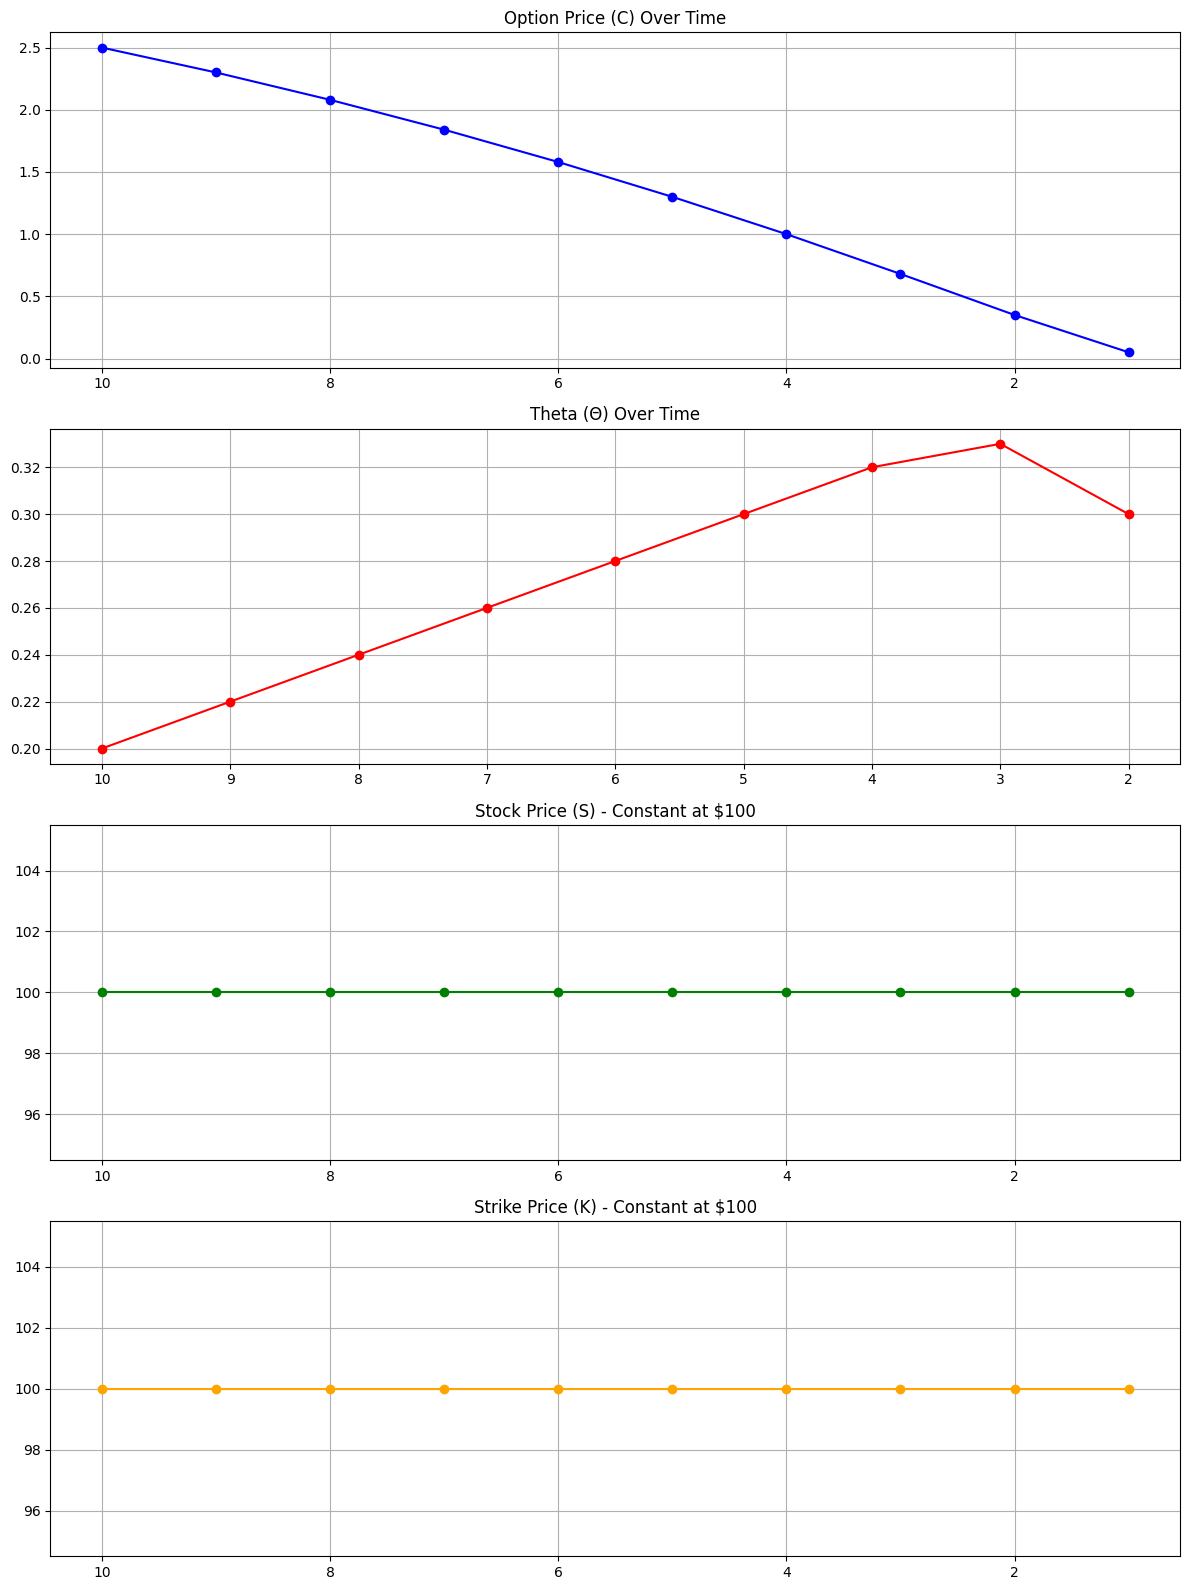

In [6]:
# Plot each variable separately - barebones with grid and markers
plt.figure(figsize=(12, 16))

# Subplot 1: Option Price (C)
plt.subplot(4, 1, 1)
plt.plot(days_left, atm_prices, color='blue', marker='o')
plt.title('Option Price (C) Over Time')
plt.gca().invert_xaxis()
plt.grid()

# Subplot 2: Theta (Θ)
plt.subplot(4, 1, 2)
plt.plot(days_left[:-1], atm_thetas, color='red', marker='o')
plt.title('Theta (Θ) Over Time')
plt.gca().invert_xaxis()
plt.grid()

# Subplot 3: Stock Price (S) - Constant
plt.subplot(4, 1, 3)
stock_price = [100] * len(days_left)
plt.plot(days_left, stock_price, color='green', marker='o')
plt.title('Stock Price (S) - Constant at $100')
plt.gca().invert_xaxis()
plt.grid()

# Subplot 4: Strike Price (K) - Constant
plt.subplot(4, 1, 4)
strike_price = [100] * len(days_left)
plt.plot(days_left, strike_price, color='orange', marker='o')
plt.title('Strike Price (K) - Constant at $100')
plt.gca().invert_xaxis()
plt.grid()

plt.tight_layout()
plt.show()

## Larger Example

### Mathematical Foundation

For simplicity sake we can see our model of ATM option prices resembles the function $f(x) = e^{-x}$ so replacing the variables we will get:

$$C(t) = C_0 \cdot e^{-kt}$$

**Where:**

- $C(t)$ is the option price at time $t$
- $C_0$ is the initial price of the option (when $t = 0$)
- $k$ is the decay rate constant
- $t$ is the number of days passed since the option was purchased

**Key Properties:**
- When $t = 0$: $C(0) = C_0$ (starts at initial price)
- As $t$ increases: $C(t)$ decreases exponentially
- Days remaining = $T_0 - t$ (where $T_0$ is total days until expiration)
- The option value decays faster as it approaches expiration

### Our Example Parameters

**Constants:**
1. $C_0 = 100$ (initial option price)
2. $T_0 = 90$ (total days until expiration) (normally $T$ would be a percentage of year but we are going to use it as days)
3. $k = 0.02$ (decay rate constant)

### Visual Representation

<div style="text-align: center;">
<iframe src="https://www.desmos.com/calculator/giugjvah02?embed" width="1000" height="500" style="border: 1px solid #ccc" frameborder="0"></iframe>
</div>

### Finding Theta Through Derivatives

To find theta, we need to take the derivative of the option price function with respect to time:

$$C(t) = C_0 \cdot e^{-kt}$$

$$\Theta = \frac{dC}{dt} = \frac{d}{dt}[C_0 \cdot e^{-kt}]$$

$$\Theta = \frac{dC}{dt} = -kC_0 \cdot e^{-kt}$$

$$\Theta = -k \cdot C(t)$$

**Key Insight:** This explains the theta acceleration pattern observed earlier - when options are worth more (far from expiration), they lose more dollars per day. As they approach worthlessness, there's less left to lose, so theta magnitude decreases.

In [7]:
def option_price_decay(C0, k, t):
   """
   Calculate the option price decay based on initial price C0, decay rate k, and time t.
   The decay is exponential, simulating how option prices decrease over time.
   
   C0: initial option price (when t = 0)
   k: decay rate constant
   t: number of days passed since option was purchased
   """
   return float(C0 * np.exp(-k * t))  # NEGATIVE k*t makes prices DECAY

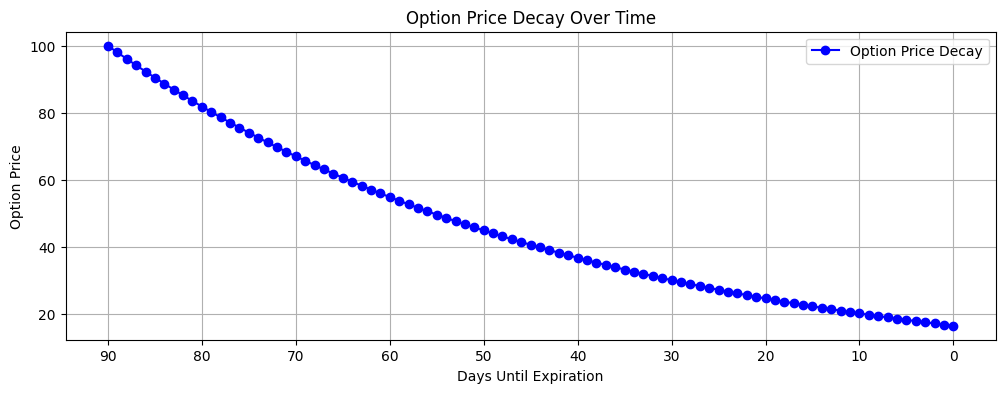

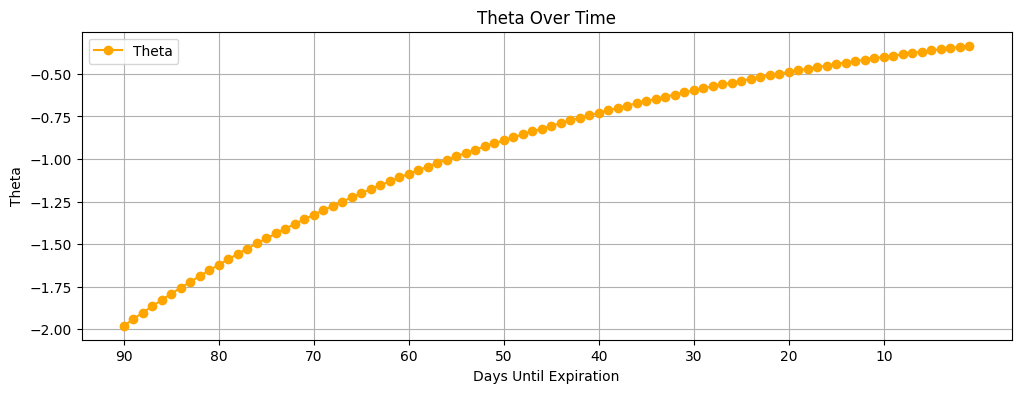

In [8]:
T0 = 90
C0 = 100
k = 0.02  # Decay rate

# Calculate option prices for each time value
option_prices = []
days_until_exp = []
thetas = []

for t in range(0, T0 + 1):
   price = option_price_decay(C0, k, t)  # Use positive k (function has negative sign built in)
   option_prices.append(price)
   days_until_exp.append(T0 - t)
   
   # Calculate theta (avoid going beyond T0)
   if t < T0:
       next_price = option_price_decay(C0, k, t + 1)
       theta = (next_price - price) / 1  # Daily change
       thetas.append(theta)

# Plot the results
plt.figure(figsize=(12, 4))
indices = list(range(len(days_until_exp)))
plt.plot(indices, option_prices, label='Option Price Decay', color='blue', marker='o')

# Set x-axis labels to show days remaining
step = 10
tick_positions = list(range(0, len(days_until_exp), step))
tick_labels = [days_until_exp[i] for i in tick_positions]
plt.xticks(tick_positions, tick_labels)

plt.title('Option Price Decay Over Time')
plt.xlabel('Days Until Expiration')
plt.ylabel('Option Price')
plt.grid()
plt.legend()
plt.show()

# Plot Theta
plt.figure(figsize=(12, 4))
theta_indices = list(range(len(thetas)))
plt.plot(theta_indices, thetas, label='Theta', color='orange', marker='o')

# Set x-axis labels for theta (one less data point)
theta_tick_positions = list(range(0, len(thetas), step))
theta_tick_labels = [days_until_exp[i] for i in theta_tick_positions]
plt.xticks(theta_tick_positions, theta_tick_labels)

plt.title('Theta Over Time')
plt.xlabel('Days Until Expiration')
plt.ylabel('Theta')
plt.grid()
plt.legend()
plt.show()

## 